In this project, data from the [Survey of Consumer Finances (SCF)](https://www.federalreserve.gov/econres/aboutscf.htm), which is sponsored by the US Federal Reserve is analysed. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years. An extract of the results from 2019 is chosen for analysis. Here is the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkh01.htm) for the data.

* `OBJECTIVES OF THE PROJECT:`

    * Comparing characteristics across subgroups using a side-by-side bar chart.
    * Building a `k-means clustering` model.
    * Conducting feature selection for clustering based on variance.
    * Reducing high-dimensional data using `principal component analysis (PCA)`.
    * Designing, building and deploying a Dash web application.
    
* **On Clustering:**
    * Also known as Customer Segmentation in Marketing.
        * Identify target groups from data, and personalise services accordingly.
    * In Sociology, it is called Social Stratification.
        * Divide population in social classes to check organisation of society.
        
* **SECTION GOALS:**
    * This section focuses on `Exploratory Data Analysis (EDA)`.
        * Subsetting data to focus on 'credit fearful' households.
        * Exploring demographic information like `age`, `race`, `education`, `income` and `assets`.
        * Side-by-side bar charts to highlight differences between 'credit fearful' and other households

* ML WORKFLOW:
    * Preparing Data
        * Importing Data
        * Exploring Data: `Method Chaining` for Multiple Transformations

In [1]:
# Importing necessary libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparing Data
## 1.1 Importing
* pandas `read_csv` function can work with compressed files directly. There is no need to decompress `zip` files.

In [2]:
df = pd.read_csv('SCFP2019.zip')
print('df shape:', df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


* This dataframe is extremely wide (351 Features).
* The features appear to be numerical, but that needs to be explored further

### Subsetting Data
* Subsetting `df` to include only those households which have been turned down, or are fearful of being denied credit in last 5 years `TURNFEAR == 1`. Assigning this subset to variable `df_fear`.

In [3]:
# Creating a mask
mask = df['TURNFEAR'] == 1
df_fear = df[mask]
print('df_fear shape:', df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


* It turns out that there are 4623 households, which are fearful of being denied credit

## 1.2 Exploring Data
### Age
* `AGECL` : Age group of the reference person

In [4]:
# Checking which are the unique age groups in `df_fear` subset
age_groups = df_fear['AGECL'].unique()
print('Age Groups:', age_groups)

Age Groups: [3 5 1 2 4 6]


* Even though this feature was numeric, it was holding categorical data
* This underscores the importance of reading the data documentation to really know what each feature means

#### Replacing Age Groups
* It would be useful to put a label to the integer values in Age Groups list

In [5]:
# Creating a series `agecl` which contains observations from `AGECL` using true group names
agecl_dict = {
    1: 'Under 35',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '75 or Older'
}
# Replacing values in `age_cl` using above dictionary
age_cl = df_fear['AGECL'].replace(agecl_dict)
age_cl.head(10)

5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

#### Age Group Bar Chart

In [6]:
# Checking value counts for each label
age_cl.value_counts()

Under 35       1307
35-44          1093
45-54           932
55-64           745
65-74           401
75 or Older     145
Name: AGECL, dtype: int64

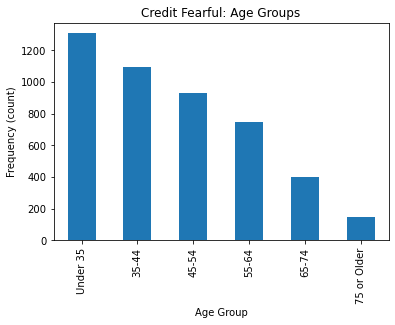

In [7]:
age_cl_value_counts = age_cl.value_counts()
# Plotting age_cl_value_counts
age_cl_value_counts.plot(
    kind = 'bar',
    xlabel = 'Age Group',
    ylabel = 'Frequency (count)',
    title = 'Credit Fearful: Age Groups'
);

* This histogram is trying to depict that the many people under the age of 35 are fearful of being denied credit
* But this may not be true because since the bins are only 6 here
* It would be better to plot actual ages, instead of age groups to see the granular picture

#### Age Histogram

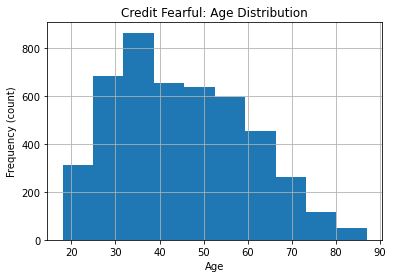

In [8]:
# Creating a Histogram of `AGE` column with 10 bins
df_fear['AGE'].hist(bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency (count)')
plt.title('Credit Fearful: Age Distribution');

* This gives a better picture of which age groups are more concerned about getting credit.
* It can be seen that the highest number of people are in the age group 30-40.
* It still shows that younger people are concerned about credit
* On a wider level, people between 25-60 are fearful

### Race/Ethnicity
From the Code Book, it emerges that race has 4 categories
#### Race Bar Chart: Credit Fearful

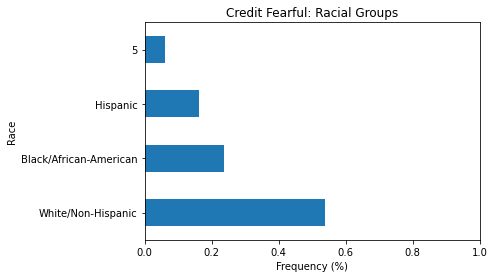

In [9]:
# Creating a `race_dict`
race_dict = {
    1: 'White/Non-Hispanic',
    2: 'Black/African-American',
    3: 'Hispanic',
    4: 'Other'
}
# Replacing values in RACE column with race_dict values
race = df_fear['RACE'].replace(race_dict)
# Counting race values
race_value_counts = race.value_counts(normalize = True)

# Creating bar chart of normalised race value counts
race_value_counts.plot(kind = 'barh')
plt.xlim(0, 1)
plt.xlabel('Frequency (%)')
plt.ylabel('Race')
plt.title('Credit Fearful: Racial Groups');

* Although it can be inferred from the above plot that White/Non-Hispanic racial group is most fearful of getting credit, but is there something deeper going on?
* If white/non-hispanic group is more represented in data, then surely, they would be more frequently visible

#### Race Bar Chart: Whole Dataset
To get a better picture, racial distribution of the entire SCF extract dataset needs to be checked

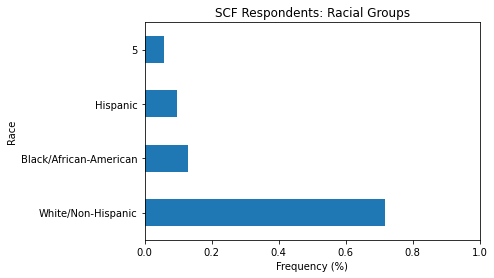

In [10]:
# Replacing values in `RACE` feature using the dictionary from above
race = df['RACE'].replace(race_dict)
# Normalising race value counts
race_value_counts = race.value_counts(normalize = True)
# Plotting RACE distribution
race_value_counts.plot(kind = 'barh')
plt.xlim(0,1)
plt.xlabel('Frequency (%)')
plt.ylabel('Race')
plt.title('SCF Respondents: Racial Groups');

* It can be seen that White/Non-Hispanic respondents constitute a majority in the extracted dataset
* But if we take the credit fearful subset, they make up a smaller percentage than overall
* On the other hand, the proportion of hispanic and black americans are more disproportionately fearful of being denied credit
* It is imperative to look at data from multiple angles, to arrive at a conclusion

### Income
#### Income Categories: Credit Fearful vs Credit Fearless
* It would be interesting to see how people with varying income levels are fearful or fearless of being denied credit
* To make the visualisation, three columns would be needed:
    * Credit Fearful (TURNFEAR)
    * Income Category (INCCAT)
    * Normalised frequency values

In [11]:
# Creating income category dictionary
inccat_dict = {
    1: '0-20',
    2: '21-39.9',
    3: '40-59.9',
    4: '60-79.9',
    5: '80-89.9',
    6: '90-100'
}
# Transforming `INCCAT` feature column
df_inccat = (
    df['INCCAT']
    .replace(inccat_dict) # Replacing values from inccat_dict
    .groupby(df['TURNFEAR']) # Grouping by credit fearful or not
    .value_counts(normalize = True)
    .rename('frequency') # Renaming normalised column as frequency
    .to_frame() # Saving to a dataframe
    .reset_index() # Resetting index
)
df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


#### Income Categories: Side-by-Side Bar Chart

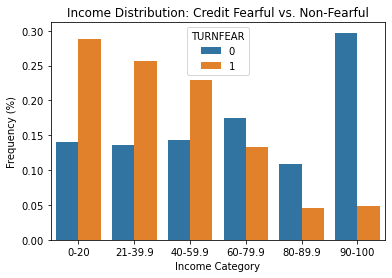

In [12]:
# Creating barchart of `df_inccat`
sns.barplot(
    x = 'INCCAT',
    y = 'frequency',
    hue = 'TURNFEAR',
    data = df_inccat,
    order = inccat_dict.values()
)
plt.xlabel('Income Category')
plt.ylabel('Frequency (%)')
plt.title('Income Distribution: Credit Fearful vs. Non-Fearful');

* As logic would have suggested, respondents on the lower income percentiles are more fearful of being denied credit.
* Respondents on the higher percentile e.g. 90-100 do not have those worries

### Assets
#### Assets vs Home Values: Entire Dataset
ASSET - Total value of assets held by a Household 2019 USD
HOUSES - Total value of primary residence of household, 2019 USD

In [13]:
# Correlation between assets and home values
asset_house_corr = df['ASSET'].corr(df['HOUSES'])
print('SCF: Asset Houses Correlation:', asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


* There appears to be a mild positive correlation between assets held and the value of primary house of households in total population
* It makes sense because for most households, the house is the most valuable asset

#### Assets vs Home Values: Credit Fearful

In [14]:
# Checking correlation between Houses and Assets for Credit Fearful group
asset_house_corr = df_fear['ASSET'].corr(df_fear['HOUSES'])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735979154


* It turns out that Correlation between Houses and Assets is even more pronounced for Credit Fearful subset.
* It does make some sense because it is possible that respondents in the higher income percentiles would have other financial assets e.g. stocks, bonds, other real estate or other businesses
* But for lower income households, their primary house constitutes the major portion of asset

#### Correlation Matrix
* Considering only `ASSET`, `HOUSES`, `INCOME`, `DEBT` and `EDUC` columns

In [15]:
# selecting columns
cols = ['ASSET', 'HOUSES', 'INCOME', 'DEBT', 'EDUC']
# Correlation among columns in corr
corr = df[cols].corr()
# Changing background style
corr.style.background_gradient(axis = None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


* It turns out that Income is even more correlated to Assets than primary House Prices for households in total population~

#### Correlation Matrix: Credit Fearful

In [16]:
# Checking correlation for credit fearful subset
corr = df_fear[cols].corr()
corr.style.background_gradient(axis = None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


* The relationship between `"DEBT"` and `"HOUSES"` is positive for both datasets, but while the coefficient for `df` is fairly weak at 0.26, the same number for `df_fear` is 0.96. 
* The value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by `"TURNFEAR"` repondents is their primary residence.
* `"DEBT"` and `"ASSET"` share a similarly striking difference, as do `"EDUC"` and `"DEBT"`

### Education
#### Credit Fearful vs Credit Fearless
Creating a dataframe `df_educ`that shows normalised frequency for education categories for credit fearful and credit fearless households

In [18]:
df_educ = (
    df['EDUC']
    .groupby(df['TURNFEAR'])
    .value_counts(normalize = True)
    .rename('frequency')
    .to_frame()
    .reset_index()
)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


#### Education: Side-by-Side Bar Chart

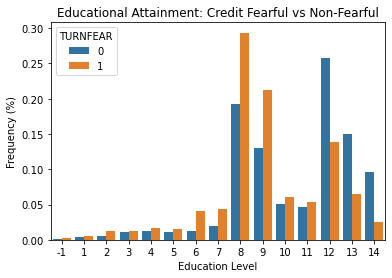

In [19]:
# Creating bar chart of `df_educ`
sns.barplot(
    x = 'EDUC',
    y = 'frequency',
    hue = 'TURNFEAR',
    data = df_educ
)
plt.xlabel('Education Level')
plt.ylabel('Frequency (%)')
plt.title('Educational Attainment: Credit Fearful vs Non-Fearful');

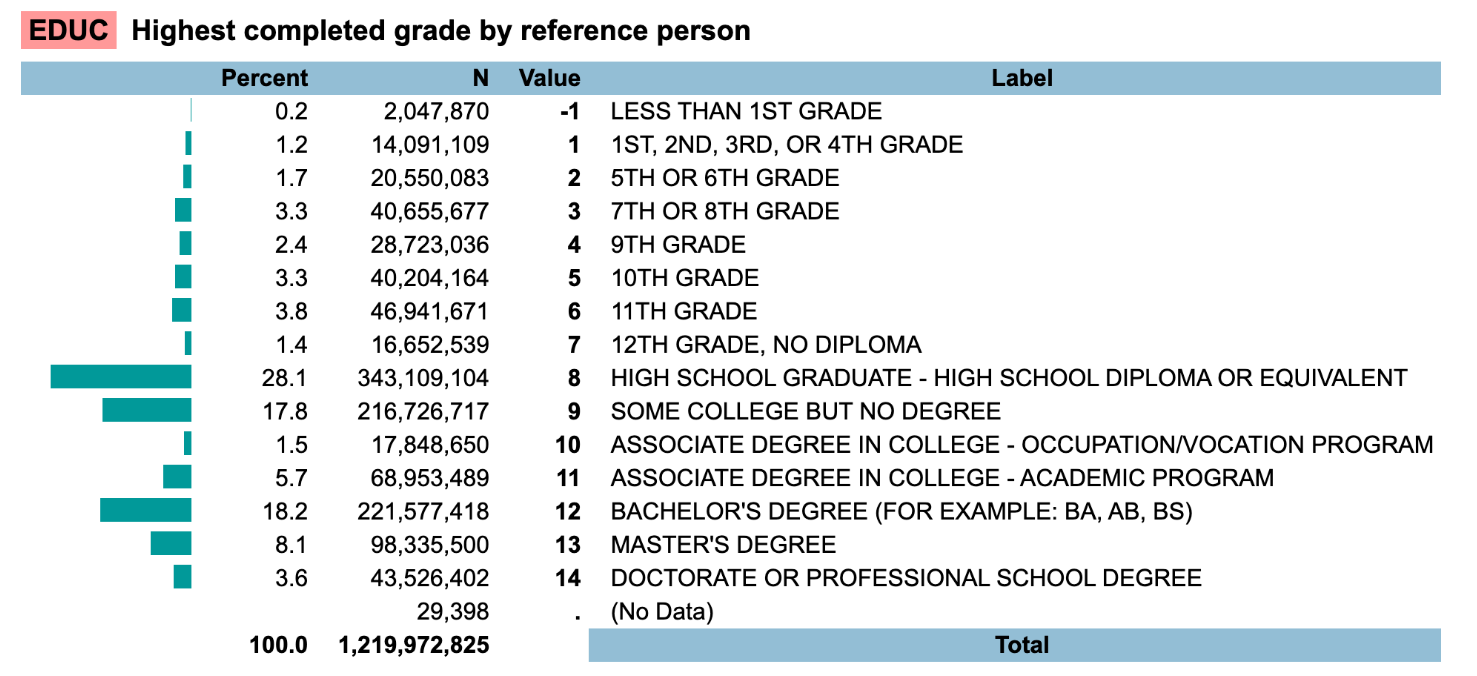
* It appears that as educational attainment rises, households become less fearful of being denied credit
* Highly educated households have little fear of being denied credit
* But those who fail to finish college or do not get to study after high school are more fearful of being denied credit
* Those at the lower end of educational level, before 12 (University degree), are fearful

### Debt
#### Assets vs Debt: Whole Dataset

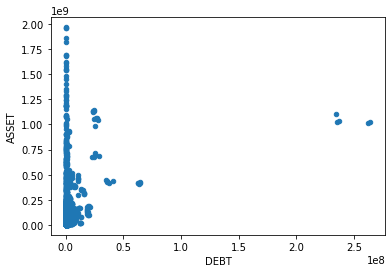

In [21]:
# Creating scatterplot of `ASSET` vs `DEBT` for `df`
df.plot.scatter(x = 'DEBT', y = 'ASSET');

* The labels on y axis are in billions. The labels on x axis are in 100 millions
* There is a small group of outliers which is carrying hundreds of millions in debt, but their assets are in billions as well
* There is not necessarily a strong correlation between assets and debt
* There is a huge spread in total population regarding the assets
* This plot would make more sense if seen for credit fearful families

#### Assets vs Debt: Credit Fearful

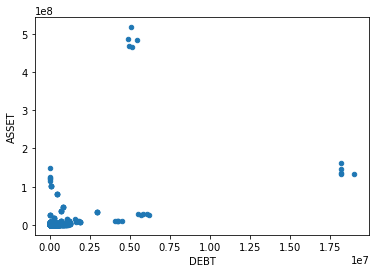

In [22]:
# Creating scatterplot of `ASSET` vs `DEBT` for `df_fear`
df_fear.plot.scatter(x = 'DEBT', y = 'ASSET');

* The scales are different from the previous scatter plot. Y axis is in 100 millions and X axis is in 10 million
* There are clusters emerging
    * One cluster has not much debt but serious amount of assets
    * the other one has serious debt but not so high assets
    * There are other clusters as well
* It turns out that even in the credit fearful subset, there are interesting profiles of households

#### House Value vs Debt: Whole Dataset

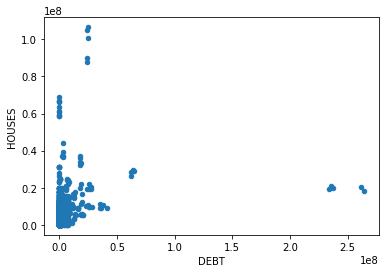

In [23]:
# Creating scatter plot of `HOUSES` vs `DEBT` for `df`
df.plot.scatter(x = 'DEBT', y = 'HOUSES');

* There is a moderate correlation
* But again there are multiple clusters emerging

#### House Values vs Debt: Credit Fearful

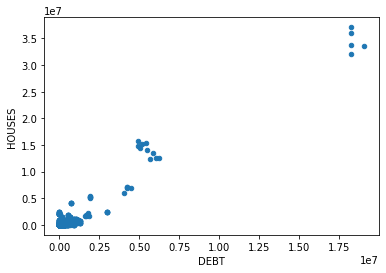

In [24]:
# Creating scatter plot of `HOUSES` vs `DEBT` for `df_fear`
df_fear.plot.scatter(x = 'DEBT', y = 'HOUSES');

* There is much stronger correlation between House Prices and Debt for credit fearful households
* There are distincts groups which could be targeted as there are multiple clusters in data